In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def plot_DAG(num_features, your_weight_matrix, node_size):
    # your_weight_matrix = np.transpose(your_weight_matrix)
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes (features)
    # features = [f"Feature {i}" for i in range(1, num_features + 1)]
    features = ['spo2', 'bicarb_(hco3)', 'blood_urea_nitrogen_(bun)',
       'calcium', 'creatinine', 'phosphorus', 'hemoglobin', 'platelets',
       'white_blood_cell_count', 'albumin', 'bilirubin_total', 'inr',
       'lactic_acid', 'partial_prothrombin_time_(ptt)', 'protein', 'troponin',
       'fio2', 'best_map', 'pf_pa', 'Transfusion']
    G.add_nodes_from(features)

    # Add weighted edges to represent relationships
    # You will need to specify the weights based on your data
    # For example, you can use a nested loop to set the weights for each pair of features
    print(your_weight_matrix[1][0])
    for i in range(num_features):
        for j in range(num_features):
            weight = your_weight_matrix[i][j]  # Replace with your actual weight matrix
            if weight != 0:  # You can customize this condition based on your data
                G.add_edge(features[j], features[i], weight=weight)

    # Define a circular layout
    pos = nx.circular_layout(G)

    # Extract edge weights
    edge_weights = [d["weight"] for u, v, d in G.edges(data=True)]
    edge_colors = ['red' if w < 0 else 'blue' for w in edge_weights]

    # Scale the edge widths based on the weights
    edge_widths = [w * 3 for w in edge_weights]  # You can adjust the multiplier as needed
    # edge_widths = [w *30 for w in edge_weights]
    # edge_widths = edge_weights
    
    # Diagnostic print statements
    # print("Number of nodes in graph:", len(G.nodes))
    # print("Length of node_size array:", len(node_size))
    node_size = node_size*2000
    # print(node_size)
    
    # Draw nodes and edges with customized edge widths and no labels
    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color="skyblue", font_size=8, 
            font_color="black", edge_color=edge_colors, 
            width=edge_widths,arrowstyle='-|>', connectionstyle="arc3,rad=0.1")
    
    # Display the graph without edge labels
    plt.title("Feature Relationship DAG (Circular Layout)")
    plt.show()
    
    return

In [4]:
def CI95(arr, mode="centered"):
    if mode == "centered":
        arr.sort()
        low_ind = int(len(arr)*0.025)
        up_ind = int(len(arr)*0.975)
    
    lower = arr[low_ind]
    upper = arr[up_ind]
    
    CI95array = arr[low_ind:up_ind]
    return upper, lower, CI95array

def average_DAG(data):
    A_fitted_all = []
    mu_fitted_all = []

    # concatenate all adjacency matrices and nodes
    for key in data:
        A_fitted_all.append(data[key]["A_fitted"])
        mu_fitted_all.append(data[key]["mu_fitted"])
    A_fitted_all = np.array(A_fitted_all)
    mu_fitted_all = np.array(mu_fitted_all)

    # Go through 95% confidence interval
    final_adj = np.zeros([np.shape(A_fitted_all)[1],np.shape(A_fitted_all)[2]])
    final_node_size = []
    for i in range(np.shape(A_fitted_all)[1]):
        _, _, CI95array = CI95(mu_fitted_all[:,i])
        final_node_size.append(np.median(CI95array))
        for j in range(np.shape(A_fitted_all)[2]):
            _, lower, CI95array = CI95(A_fitted_all[:,i,j])
            # if lower > 0:
            final_adj[i,j] = np.median(CI95array)
    return final_adj, np.array(final_node_size)

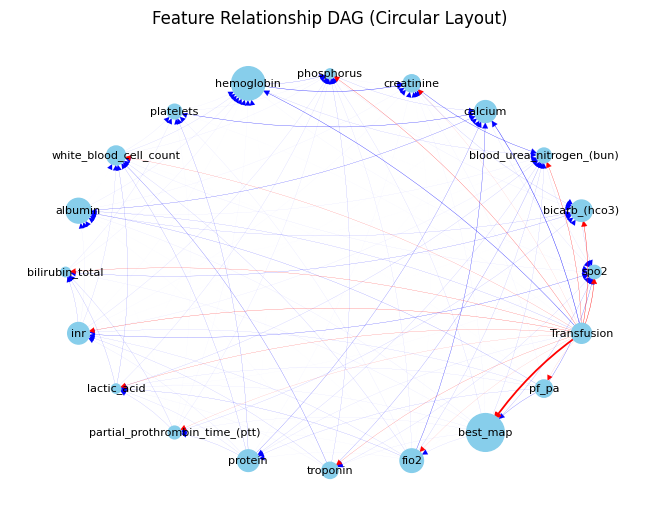

In [5]:
import pickle
with open('transfusion_bootstraped30_DAG_20240229_trans_volume.pkl', 'rb') as f:
  bootstraped30_DAG = pickle.load(f)

final_adj, final_node_size = average_DAG(bootstraped30_DAG)
plot_DAG(20,final_adj, final_node_size)

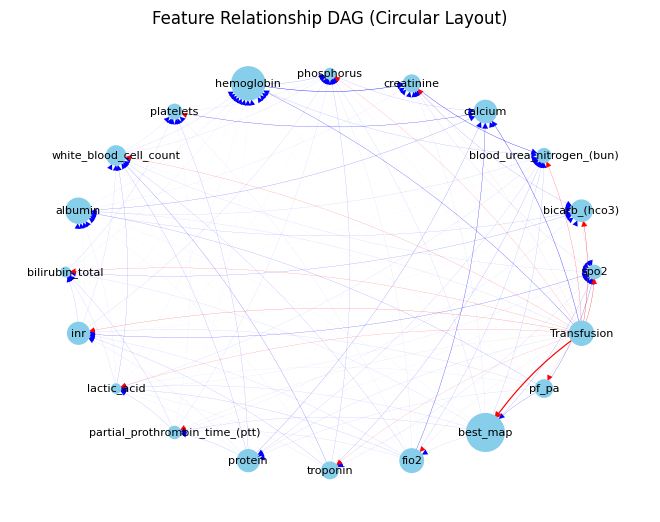

In [5]:
import pickle
with open('transfusion_bootstraped30_DAG_20240213_trans_binary.pkl', 'rb') as f:
  bootstraped30_DAG = pickle.load(f)

final_adj, final_node_size = average_DAG(bootstraped30_DAG)
plot_DAG(20,final_adj, final_node_size)

/home/json336/.local/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/opt/modules/PythonCentOS7/3.11.5/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:767: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


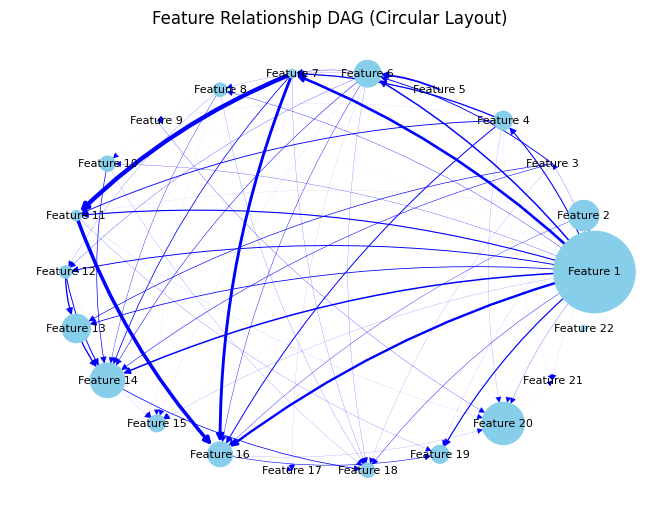

In [5]:
import pickle
with open('transfusion_bootstraped30_DAG_not_paralleled.pkl', 'rb') as f:
  bootstraped30_DAG = pickle.load(f)

final_adj, final_node_size = average_DAG(bootstraped30_DAG)
plot_DAG(22,final_adj, 5*final_node_size)

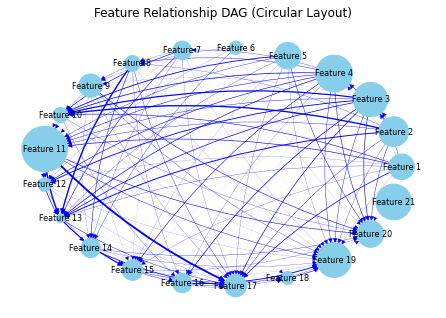

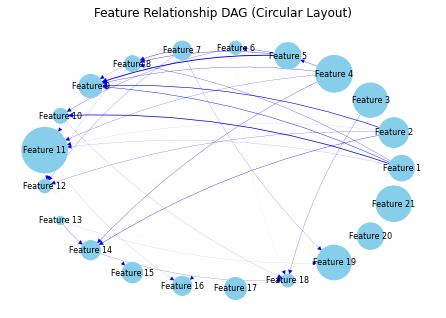

In [68]:
weight_matrix = np.genfromtxt('Rough_estimation_graph.csv', delimiter=',')
node_size = np.genfromtxt('node_size.csv')
plot_DAG(weight_matrix, node_size)

weight_matrix = np.genfromtxt('Graph.csv', delimiter=',')
node_size = np.genfromtxt('node_size.csv')
plot_DAG(weight_matrix, node_size)

## Node 21 is sepsis
## Node 20 is anti-biotic therapy
## Node 13 is Vesopressor support

### try to get 20 and 18 having inhibitory effect